# Fundamentos de informática Urbana 2023

##Conexión con Google Drive e importación de bibliotecas

In [1]:
from google.colab import drive, files
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez


In [2]:
!pip install folium #mapas interactivos
!pip install branca #Colores y Leyendas de mapas
!pip install utm #Convercion de coordenadas
!pip install contextily #Relaciona los mapas a geo espaciales

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.8.0-py3-none-any.whl size=8536 sha256=4dc47fc37640e5ff802eb5b7e178e29145a721e7ec38852c09509d9057538a7a
  Stored in directory: /root/.cache/pip/wheels/b0/88/9b/1968d3a5933864f7d6312d8217027dd4d52b9647f678c67023
Successfully built utm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 19.5 MB/s eta 0:00:00


In [3]:
import numpy as np #Calculo numerico
import matplotlib.pyplot as plt #Visualizacion
import datetime #Fechas y horas
import matplotlib #Visualizacion
import pandas as pd #Dateframe
import geopandas as gpd #Geoespaciales
import matplotlib.colors as mcolors #Colores de visualizacion
import shapely as sy #Geometrias y puntos espaciales
from shapely.geometry import Point #
import os #Sistemas de archivos
import warnings #Para manejar y suprimir advertencias
import pyproj
from pyproj import CRS
from pyproj.exceptions import CRSError
import networkx as nx
import utm
from scipy.spatial import distance_matrix
import math
from branca.element import Figure, Element
import folium
from folium.plugins import HeatMap
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
ruta = "/content/drive/My Drive/Colab Notebooks/FIU_2023_de_León_Martínez/data/"
%matplotlib inline

In [4]:
#!unzip "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/v_uptu_paradas.zip" -d "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/"
#!unzip "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/bus_stops.zip" -d "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/"
#!unzip "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/bus_lines.zip" -d "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/"
#!unzip "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/neighborhoods.zip" -d "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/"
#!unzip "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/blocks.zip" -d "/content/drive/MyDrive/Colab Notebooks/FIU_2023_de_León_Martínez/data/"

In [5]:
# Manzanas - Geopandas con dataframe
geoManzanas = gpd.GeoDataFrame.from_file(ruta + "blocks/v_mdg_manzanas.shp")
# Barrios - Geopandas con dataframe
geoBarrios = gpd.GeoDataFrame.from_file(ruta + "neighborhoods/barrios_ine_uy.shp")
# proyeccion de los geodataframes - Imprimen el sistema de referencia de ambos
print(geoManzanas.crs)
print(geoBarrios.crs)

EPSG:32721
EPSG:32721


In [6]:
# reproyectamos barrios y manzanas a latitud y longitud (epsg 4326) - to_crs transforma el CRS de un GeoDataFrame al CRS especificado / epsg=4326 indica que el CRS de destino es EPSG:4326
geoBarrios = geoBarrios.to_crs(epsg=4326)
geoManzanas = geoManzanas.to_crs(epsg=4326)
print(geoBarrios.crs)
print(geoManzanas.crs)

EPSG:4326
EPSG:4326


Text(0.5, 1.0, 'Montevideo: barrios\n')

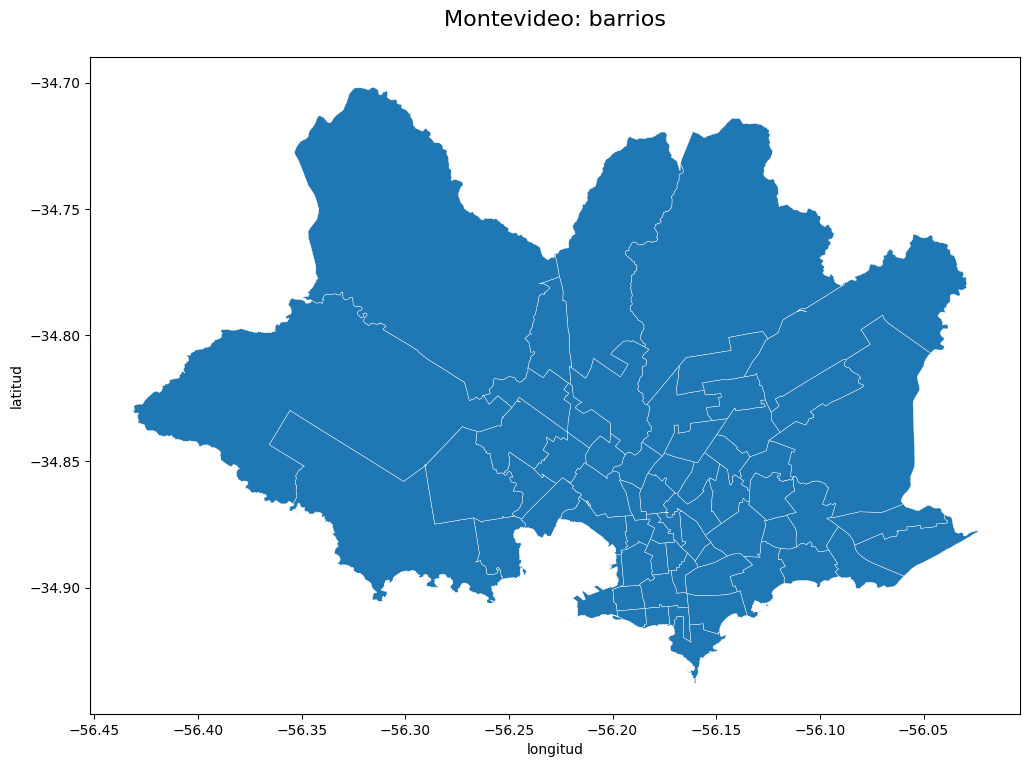

In [7]:
# Mostrar los Barrios de Montevideo
geoBarrios.plot(linewidth = 0.3,edgecolor='white',
                figsize=(12,10))

plt.xlabel('longitud') #Establece la etiqueta del eje x
plt.ylabel('latitud') #Establece la etiqueta del eje y
plt.title("Montevideo: barrios\n", size=16) #Titulo de la grafica

Text(0.5, 1.0, 'Montevideo: Manzanas\n')

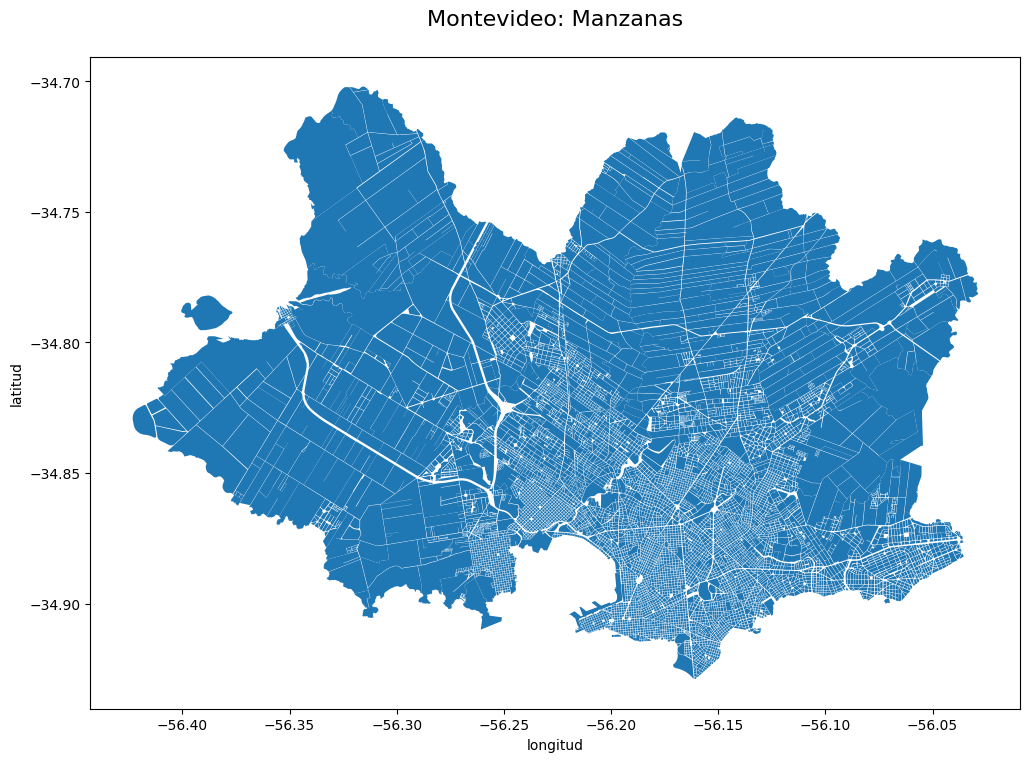

In [8]:
# Mostrar las manzanas de Montevideo
geoManzanas.plot(figsize=(12,10))
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.title("Montevideo: Manzanas\n", size=16)

##Paradas

In [9]:
#Paradas
geoParadas = gpd.GeoDataFrame.from_file(ruta + "v_uptu_paradas.shp",encoding='UTF-8') #el argumento encoding utf-8 sirve para caracteres especiales, como la ñ
print(geoParadas.crs)
geoParadas = geoParadas.to_crs(epsg=4326) # reproyectamos a latitud y longitud (epsg 4326)
print(geoManzanas.crs)

#Revisamos el geodataframe de las paradas, para ver su estructura y ver que datos contiene
geoParadas.head()

EPSG:32721
EPSG:4326


COD_UBIC_P DESC_LINEA  COD_VARIAN  ORDINAL   CALLE       ESQUINA  \
0       546.0        144         883       44  CORUÑA  PURIFICACION   
1       546.0        144        3225       46  CORUÑA  PURIFICACION   
2       547.0        144         883       45  CORUÑA   SAN ANTONIO   
3       547.0        144        3225       47  CORUÑA   SAN ANTONIO   
4       548.0        144         888       20  CORUÑA   SAN ANTONIO   

   COD_CALLE1  COD_CALLE2             X             Y  \
0      2187.0      5733.0  578023.60011  6.140711e+06   
1      2187.0      5733.0  578023.60011  6.140711e+06   
2      2187.0      6279.0  577944.25345  6.140829e+06   
3      2187.0      6279.0  577944.25345  6.140829e+06   
4      2187.0      6279.0  577926.50589  6.140845e+06   

                      geometry  
0  POINT (-56.14629 -34.87297)  
1  POINT (-56.14629 -34.87297)  
2  POINT (-56.14717 -34.87192)  
3  POINT (-56.14717 -34.87192)  
4  POINT (-56.14737 -34.87178)

In [10]:
def quitar_espacios_columnas(x):
  """definimos una función que depura los nombres de columna si poseen espacios, y por otra parte,
  otra función en la que depura los espacios en los datos , aunque puede llegar a cambiar el tipo de datos """
  cols = list(x.columns)
  cols = [s.replace(' ', '_') for s in cols]
  cols
  for col in range(len(cols)):
    if cols[col][0] == '_':
      cols[col] = cols[col][1:]
      if cols[col][-1] == '_':
        cols[col] = cols[col][:-1]
    elif cols[col][-1] == "_":
      cols[col] = cols[col][:-1]
  x.columns = cols

  def remove_whitespace(y):
    for name in y.columns:
      if name != 'geometry':
        y[name] = y[name].apply(lambda value:"_".join(str(value).strip().split()))
    return y
  x = remove_whitespace(x)

  return x

geoParadas = quitar_espacios_columnas(geoParadas)
print(geoParadas.dtypes)
geoParadas

COD_UBIC_P      object
DESC_LINEA      object
COD_VARIAN      object
ORDINAL         object
CALLE           object
ESQUINA         object
COD_CALLE1      object
COD_CALLE2      object
X               object
Y               object
geometry      geometry
dtype: object


COD_UBIC_P DESC_LINEA COD_VARIAN ORDINAL           CALLE  \
0          546.0        144        883      44          CORUÑA   
1          546.0        144       3225      46          CORUÑA   
2          547.0        144        883      45          CORUÑA   
3          547.0        144       3225      47          CORUÑA   
4          548.0        144        888      20          CORUÑA   
...          ...        ...        ...     ...             ...   
41353    23995.0         D5       3936       1  CALLE_FICTICIA   
41354    23995.0        130       4747       1  CALLE_FICTICIA   
41355    23995.0        130       4753       1  CALLE_FICTICIA   
41356    23995.0          G       8802       1  CALLE_FICTICIA   
41357    23995.0        130       8804       1  CALLE_FICTICIA   

              ESQUINA COD_CALLE1 COD_CALLE2             X              Y  \
0        PURIFICACION     2187.0     5733.0  578023.60011   6140711.3452   
1        PURIFICACION     2187.0     5733.0  578023.60011   6140711.3452   
2         SAN_ANTONIO     2187.0     6279.0  577944.25345  6140828.51804   
3         SAN_ANTONIO     2187.0     6279.0  577944.25345  6140828.51804   
4         SAN_ANTONIO     2187.0     6279.0  577926.50589  6140844.77825   
...               ...        ...        ...           ...            ...   
41353  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   
41354  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   
41355  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   
41356  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   
41357  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   

                          geometry  
0      POINT (-56.14629 -34.87297)  
1      POINT (-56.14629 -34.87297)  
2      POINT (-56.14717 -34.87192)  
3      POINT (-56.14717 -34.87192)  
4      POINT (-56.14737 -34.87178)  
...                            ...  
41353   POINT (-56.22699 -34.7547)  
41354   POINT (-56.22699 -34.7547)  
41355   POINT (-56.22699 -34.7547)  
41356   POINT (-56.22699 -34.7547)  
41357   POINT (-56.22699 -34.7547)  

[41358 rows x 11 columns]

In [11]:
# Eliminamos las líneas que pasan sábados y Domingos, por ej.: 144SD
with warnings.catch_warnings():
  warnings.simplefilter(action='ignore')
  geoParadas = geoParadas[~geoParadas['DESC_LINEA'].str.endswith('SD')]
  geoParadas[["COD_UBIC_P","ORDINAL","COD_VARIAN"]] = geoParadas[["COD_UBIC_P","ORDINAL","COD_VARIAN"]].astype(float).astype(int)
geoParadas.dtypes

COD_UBIC_P       int64
DESC_LINEA      object
COD_VARIAN       int64
ORDINAL          int64
CALLE           object
ESQUINA         object
COD_CALLE1      object
COD_CALLE2      object
X               object
Y               object
geometry      geometry
dtype: object

In [12]:
geoParadas

COD_UBIC_P DESC_LINEA  COD_VARIAN  ORDINAL           CALLE  \
0             546        144         883       44          CORUÑA   
1             546        144        3225       46          CORUÑA   
2             547        144         883       45          CORUÑA   
3             547        144        3225       47          CORUÑA   
4             548        144         888       20          CORUÑA   
...           ...        ...         ...      ...             ...   
41353       23995         D5        3936        1  CALLE_FICTICIA   
41354       23995        130        4747        1  CALLE_FICTICIA   
41355       23995        130        4753        1  CALLE_FICTICIA   
41356       23995          G        8802        1  CALLE_FICTICIA   
41357       23995        130        8804        1  CALLE_FICTICIA   

              ESQUINA COD_CALLE1 COD_CALLE2             X              Y  \
0        PURIFICACION     2187.0     5733.0  578023.60011   6140711.3452   
1        PURIFICACION     2187.0     5733.0  578023.60011   6140711.3452   
2         SAN_ANTONIO     2187.0     6279.0  577944.25345  6140828.51804   
3         SAN_ANTONIO     2187.0     6279.0  577944.25345  6140828.51804   
4         SAN_ANTONIO     2187.0     6279.0  577926.50589  6140844.77825   
...               ...        ...        ...           ...            ...   
41353  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   
41354  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   
41355  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   
41356  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   
41357  CALLE_FICTICIA        0.0        0.0  570749.05849  6153887.14538   

                          geometry  
0      POINT (-56.14629 -34.87297)  
1      POINT (-56.14629 -34.87297)  
2      POINT (-56.14717 -34.87192)  
3      POINT (-56.14717 -34.87192)  
4      POINT (-56.14737 -34.87178)  
...                            ...  
41353   POINT (-56.22699 -34.7547)  
41354   POINT (-56.22699 -34.7547)  
41355   POINT (-56.22699 -34.7547)  
41356   POINT (-56.22699 -34.7547)  
41357   POINT (-56.22699 -34.7547)  

[41036 rows x 11 columns]

In [13]:
gdf_parada_linea = geoParadas
geoParadas = geoParadas.loc[:,['COD_UBIC_P','geometry']]
with warnings.catch_warnings():
  warnings.simplefilter(action='ignore')
  geoParadas.drop_duplicates(subset=['COD_UBIC_P'], keep='first', inplace=True)
  gdf_parada_linea.drop_duplicates(subset=['COD_UBIC_P','DESC_LINEA'], keep='first', inplace=True)

In [14]:
#unimos paradas con cantidad de líneas, luego les asignamos su ubicación
paradas = geoParadas.COD_UBIC_P
nro_lineas = []
for parada in paradas:
  x = len(gdf_parada_linea[gdf_parada_linea['COD_UBIC_P']==parada])
  nro_lineas.append(x)

geoParadas =gpd.GeoDataFrame(list(zip(paradas, nro_lineas, geoParadas['geometry'])), columns = ['paradas','nro_lineas','geometry'],crs=4326)
print(len(geoParadas))
geoParadas["paradas"] = geoParadas["paradas"].astype(int)
geoParadas["nro_lineas"] = geoParadas["nro_lineas"].astype(int)
geoParadas

4873


paradas  nro_lineas                     geometry
0         546           1  POINT (-56.14629 -34.87297)
1         547           1  POINT (-56.14717 -34.87192)
2         548           1  POINT (-56.14737 -34.87178)
3         549           1  POINT (-56.14903 -34.86969)
4         550           1   POINT (-56.1493 -34.86946)
...       ...         ...                          ...
4868    19607           3   POINT (-56.22398 -34.7599)
4869    19608           3  POINT (-56.22396 -34.76243)
4870    23993           3  POINT (-56.22474 -34.75486)
4871    23994           3  POINT (-56.22715 -34.75302)
4872    23995           3   POINT (-56.22699 -34.7547)

[4873 rows x 3 columns]

In [15]:
print(len(geoParadas))
# eliminamos paradas por las cuales pasen menos de 3 líneas
geoParadas.drop(geoParadas[geoParadas['nro_lineas']<3].index,inplace=True)
print(len(geoParadas))
# hay paradas que figuran fuera del departamento, por ende, sacamos las que quedan por fuera de la intersección del depto con el método overlay() de GeoPandas.
with warnings.catch_warnings():
  warnings.simplefilter(action='ignore')
  geoParadas = gpd.overlay(geoParadas, geoBarrios, how='intersection')
  geoParadas = gpd.GeoDataFrame(geoParadas,crs=4326)

4873
2221


Text(0.5, 1.0, 'Montevideo: Líneas de bus por parada\n')

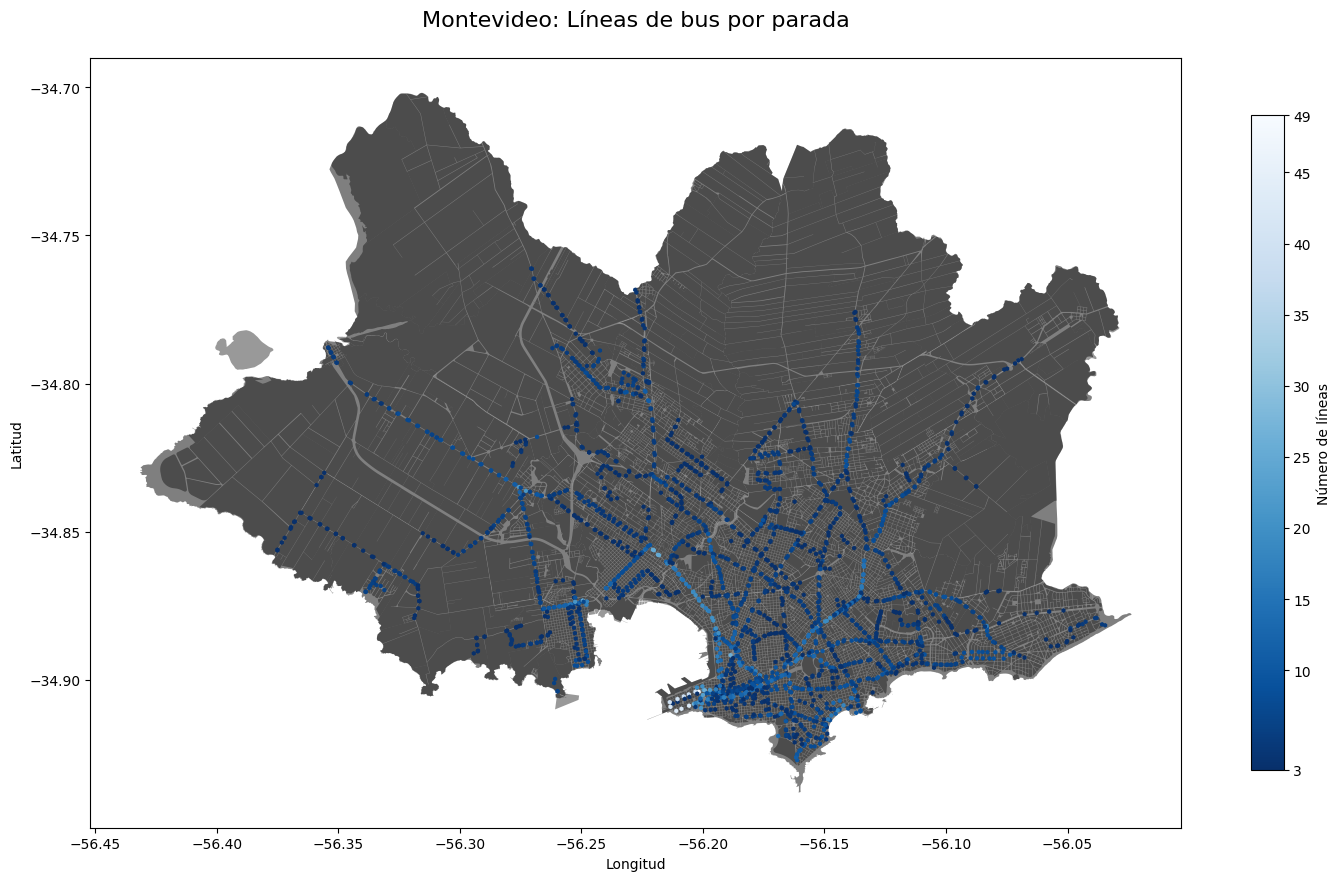

In [16]:
fig, ax =plt.subplots(figsize=(18,10))
geoBarrios.plot(linewidth = 0,alpha = 0.5, ax=ax, color = 'black')
geoManzanas.plot(alpha = 0.4,ax=ax, color = 'black')
geoParadas.plot(column='nro_lineas',marker='h',markersize=12,alpha = 1,ax=ax,cmap='Blues_r',legend=True,categorical=False, vmin=3,vmax=49, edgecolor='white', linewidth=0, zorder = 3, legend_kwds={"label": "Número de líneas","ticks":[3,10,15,20,25,30,35,40,45,49],"shrink":0.85})
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title("Montevideo: Líneas de bus por parada\n", size=16)

##Semáforos

In [17]:
geoSemaforos = pd.read_csv(ruta + 'Intersections.csv', sep=';')
geoSemaforos

RS1Id  ProgrId                                              Descr  \
0     1001        1                                                ...   
1     1002        1                                                ...   
2     1003        1                                                ...   
3     1004        1                                                ...   
4     1005        1                                                ...   
..     ...      ...                                                ...   
585  13023        1                                                ...   
586   4017        1                                                ...   
587   9027        1                                                ...   
588   9028        1                                                ...   
589  15013        1                                                ...   

           Lat        Lon  Unnamed: 5  
0   -349107208 -562001495         NaN  
1   -349126739 -561929664         NaN  
2   -349147148 -561802444         NaN  
3   -349143977 -561729750         NaN  
4   -349154478 -561695149         NaN  
..         ...        ...         ...  
585 -348733046 -562013831         NaN  
586 -348918571 -561676521         NaN  
587 -348873868 -561864754         NaN  
588 -348896045 -561853543         NaN  
589 -348750562 -562511220         NaN  

[590 rows x 6 columns]

In [18]:
geoSemaforos = geoSemaforos.loc[:,['RS1Id','Lat','Lon']]
geoSemaforos['RS1Id'] = geoSemaforos['RS1Id'].astype(int)
geoSemaforos = geoSemaforos.sort_values('RS1Id')
geoSemaforos

RS1Id        Lat        Lon
0      1001 -349107208 -562001495
1      1002 -349126739 -561929664
2      1003 -349147148 -561802444
3      1004 -349143977 -561729750
4      1005 -349154478 -561695149
..      ...        ...        ...
437  997602 -348748500 -561658376
444  997603 -348781330 -561653602
445  997604 -348816624 -561650437
446  997803 -348767864 -561682838
447  997903 -348767864 -561682838

[590 rows x 3 columns]

In [19]:
# Los últimos datos no pertecen a la codificación del sistema y parecen ser algún error de éste, por lo que los eliminamos
geoSemaforos.drop(geoSemaforos[geoSemaforos['RS1Id']>26014].index, inplace=True)
geoSemaforos

RS1Id        Lat        Lon
0     1001 -349107208 -562001495
1     1002 -349126739 -561929664
2     1003 -349147148 -561802444
3     1004 -349143977 -561729750
4     1005 -349154478 -561695149
..     ...        ...        ...
482  26010 -348111228 -561379737
483  26011 -348085327 -561374320
493  26012 -348073234 -561371726
580  26013 -348051258 -561366185
581  26014 -347996285 -561363181

[578 rows x 3 columns]

In [20]:
# Convierte las coordenadas de latitud y longitud en objetos Point
geoSemaforos['geometry'] = geoSemaforos.apply(lambda row: Point(row['Lon']/1e7, row['Lat']/1e7), axis=1)
# Convierte el DataFrame en un GeoDataFrame
geoSemaforos = gpd.GeoDataFrame(geoSemaforos, geometry='geometry',crs=4326)
print(geoSemaforos.crs)

EPSG:4326


In [21]:
geoSemaforos

RS1Id        Lat        Lon                     geometry
0     1001 -349107208 -562001495  POINT (-56.20015 -34.91072)
1     1002 -349126739 -561929664  POINT (-56.19297 -34.91267)
2     1003 -349147148 -561802444  POINT (-56.18024 -34.91471)
3     1004 -349143977 -561729750   POINT (-56.17298 -34.9144)
4     1005 -349154478 -561695149  POINT (-56.16951 -34.91545)
..     ...        ...        ...                          ...
482  26010 -348111228 -561379737  POINT (-56.13797 -34.81112)
483  26011 -348085327 -561374320  POINT (-56.13743 -34.80853)
493  26012 -348073234 -561371726  POINT (-56.13717 -34.80732)
580  26013 -348051258 -561366185  POINT (-56.13662 -34.80513)
581  26014 -347996285 -561363181  POINT (-56.13632 -34.79963)

[578 rows x 4 columns]

Text(0.5, 1.0, 'Montevideo: Semáforos centralizados en la órbita del CGM\n')

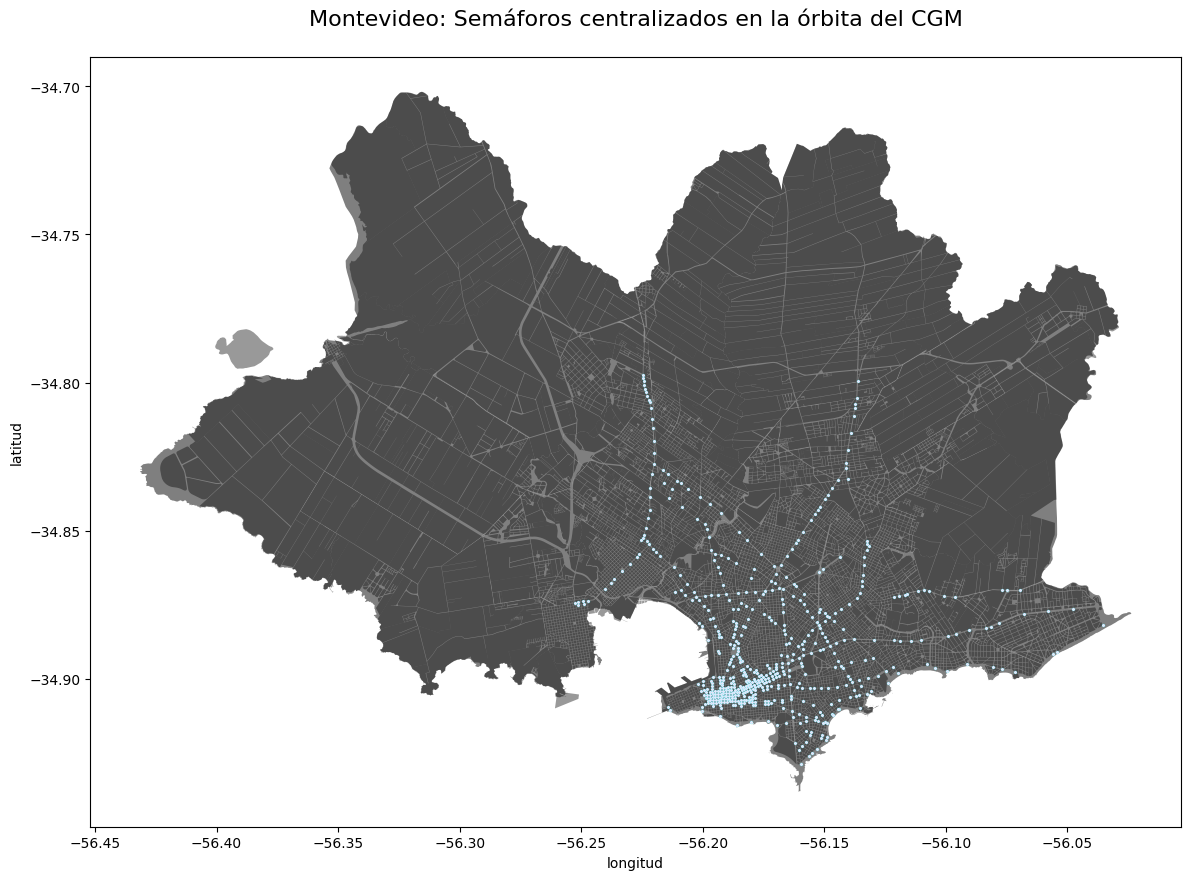

In [22]:
fig, ax =plt.subplots(figsize=(18,10))
geoBarrios.plot(linewidth = 0,alpha = 0.5, ax=ax, color = 'black')
geoManzanas.plot(alpha = 0.4,ax=ax, color = 'black')
geoSemaforos.plot(markersize=5,color = 'lavender',alpha = 1 ,ax=ax, edgecolor='aqua', linewidth=0.1)
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.title("Montevideo: Semáforos centralizados en la órbita del CGM\n", size=16)

#comentar como funciona el sistema UTOPIA como un grafo dirigido

In [40]:
Links = pd.read_csv(ruta + 'LINK.csv', sep=';')
Links

MIORI8  MIDES8  SENSO8  LINKK8 LINBU8 LINKI8  LINUS8_1  LINUS8_2  \
0      16014   12007       2       1     SI     NO       NaN       NaN   
1      16014   10018       3       1     SI     NO       NaN       NaN   
2       6006   16010       8       1     SI     NO       NaN       NaN   
3       6006   16010       8       2     SI     NO       NaN       NaN   
4      16011   16010       4       1     SI     NO       NaN       NaN   
...      ...     ...     ...     ...    ...    ...       ...       ...   
2508     127   17011      15       1     SI     NO       NaN       NaN   
2509     127   15012       2       1     SI     NO       NaN       NaN   
2510     127   15012       4       1     SI     NO       NaN       NaN   
2511   15001   15012       6       1     SI     NO       NaN       NaN   
2512   15012   15001       2       1     SI     NO       NaN       NaN   

      LINUS8_3  LINUS8_4  ...  SPARE1  SPARE2  SPARE3  SPARE4  SPARE5  \
0            0         0  ...     NaN     NaN     NaN     NaN     NaN   
1            0         0  ...     NaN     NaN     NaN     NaN     NaN   
2            0         0  ...     NaN     NaN     NaN     NaN     NaN   
3            0         0  ...     NaN     NaN     NaN     NaN     NaN   
4            0         0  ...     NaN     NaN     NaN     NaN     NaN   
...        ...       ...  ...     ...     ...     ...     ...     ...   
2508         0         0  ...     NaN     NaN     NaN     NaN     NaN   
2509         0         0  ...     NaN     NaN     NaN     NaN     NaN   
2510         0         0  ...     NaN     NaN     NaN     NaN     NaN   
2511         0         0  ...     NaN     NaN     NaN     NaN     NaN   
2512         0         0  ...     NaN     NaN     NaN     NaN     NaN   

      BloccaStima  ReservedLane SecondSignal  QueueDem  Unnamed: 42  
0               0             0          NaN       NaN          NaN  
1               0             0          NaN       NaN          NaN  
2               0             0          NaN       NaN          NaN  
3               0             0          NaN       NaN          NaN  
4               0             0          NaN       NaN          NaN  
...           ...           ...          ...       ...          ...  
2508            0             0          0.0       0.0          NaN  
2509            0             0          0.0       0.0          NaN  
2510            0             0          0.0       0.0          NaN  
2511            0             0          0.0       0.0          NaN  
2512            0             0          0.0       0.0          NaN  

[2513 rows x 43 columns]

In [41]:
"""Las entradas de la columna SENSO8 que contienen el 15 hacen referencia a una botonera peatonal en la codificación del sistema,
   por lo que topológicamente no es de nuestro interés, las quitamos"""
Links.drop(Links[Links['SENSO8']==15].index,inplace=True)
Links[['MIDES8','MIORI8']] = Links[['MIDES8','MIORI8']].astype(int) #pasamos a enteros
# Nos quedamos solo con las columnas que nos sirven:
Links = Links.loc[:,['MIORI8','MIDES8']].drop_duplicates()

nodos_del_sistema = list(set(Links['MIDES8'].to_list()+Links['MIORI8'].to_list()))
"""Elimina los duplicados, y crea una lista de nodos de ese resultado.
   De esta manera nos aseguramos que los nodos involucrados sean exactamente los que aparecen enlazados."""
print(len(nodos_del_sistema))

588


In [42]:
nodos_c_ubic = gpd.GeoDataFrame(geoSemaforos[geoSemaforos['RS1Id'].isin(nodos_del_sistema)],columns=['RS1Id','geometry'], geometry='geometry')
print(len(nodos_c_ubic))
print(len(nodos_del_sistema))
nodos_sin_ubic = list(np.setdiff1d(nodos_del_sistema,list(nodos_c_ubic['RS1Id'])))
print(nodos_sin_ubic)
# Por la forma en la que el sistema está codificado, existe un nodo fuente/sumidero (nodo 127) que no está presente físicamente.
#Estos nodos (excepto el 127) figuran sin ubicación ya que están recientemente incorporados. Los eliminaremos.
nodos_sin_ubic = nodos_sin_ubic[1:] #excluye al 127, nos servirá para modelar el grafo
for nodo in nodos_sin_ubic:
  Links.drop(Links[(Links['MIORI8']==nodo) | (Links['MIDES8'] == nodo)].index, inplace=True)
print(len(Links))

578
588
[127, 2002, 2005, 7032, 13024, 16005, 16007, 16008, 20101, 23063]
1815


In [43]:
Links = Links[Links['MIDES8']!=Links['MIORI8']] #sacamos las conexiones que van a sí mismas (lazos)
print(len(Links))
conexiones =[]
conexiones = [(x,y) for x,y in zip(Links['MIORI8'], Links['MIDES8'])] # esto nos traduce el dataframe a una lista de tuplas para armar el grafo en networkx
# 2 grafos, uno con el 127 para operar y sacar betwenness centrality, otro sin el 127 para mostrar los datos
print(len(conexiones))

1702
1702


[23063, 16008, 13024, 7032, 16005, 20101, 16007, 2002, 2005]


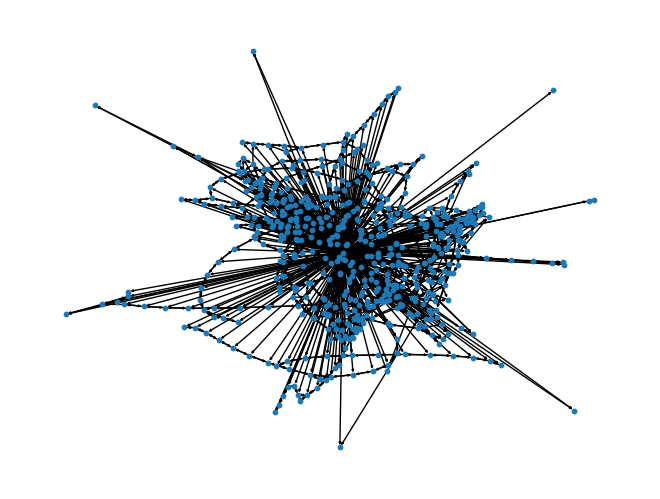

In [44]:
G = nx.DiGraph()
G.add_nodes_from(nodos_del_sistema)
G.add_edges_from(conexiones)
print(list(nx.isolates(G)))
G.remove_nodes_from(list(nx.isolates(G)))
G.add_edge(15003,15005)
G.add_edge(15005,15003)
pos=nx.spring_layout(G,scale=10)
nx.draw(G,pos=pos,node_size=10, arrowsize=3)

578


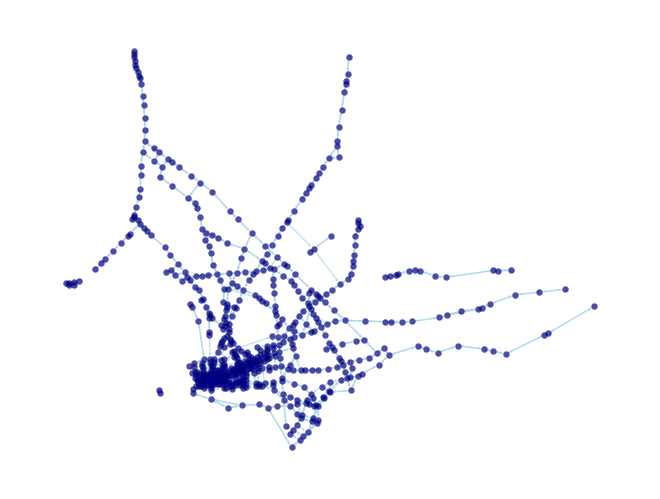

In [45]:
nodos_del_sistema_ubi = list(nodos_c_ubic['RS1Id'])
print(len(nodos_del_sistema_ubi))
Links_sin_127 = Links.drop(Links[(Links['MIORI8']==127) | (Links['MIDES8'] == 127)].index)
conexiones_sin_127 = [(x,y) for x,y in zip(Links_sin_127['MIORI8'], Links_sin_127['MIDES8'])]
# Por la forma en la que el sistema está codificado, existe un nodo fuente/sumidero (nodo 127) que no está presente físicamente.
# Debemos trabajar con un sistema con el nodo 127 presente para operar sobre el grafo y otro sistema sin este nodo de manera de poderlo representar geoespacialmente

G1 = nx.DiGraph()
G1.add_nodes_from(nodos_del_sistema_ubi)
G1.add_edges_from(conexiones_sin_127)
G.add_edge(15003,15005)
G.add_edge(15005,15003)

# Obtenemos una lista con las coordenadas de cada nodo
positions1 = nodos_c_ubic.groupby("RS1Id")["geometry"].apply(lambda g: [(p.x, p.y) for p in g]).to_dict()
positions1 = {k: v[0] for k, v in positions1.items()}
nx.draw(G1,pos=positions1,node_size=20, arrowsize=2,linewidths=0.1, node_color='navy',edge_color='lightblue', alpha= 0.7)

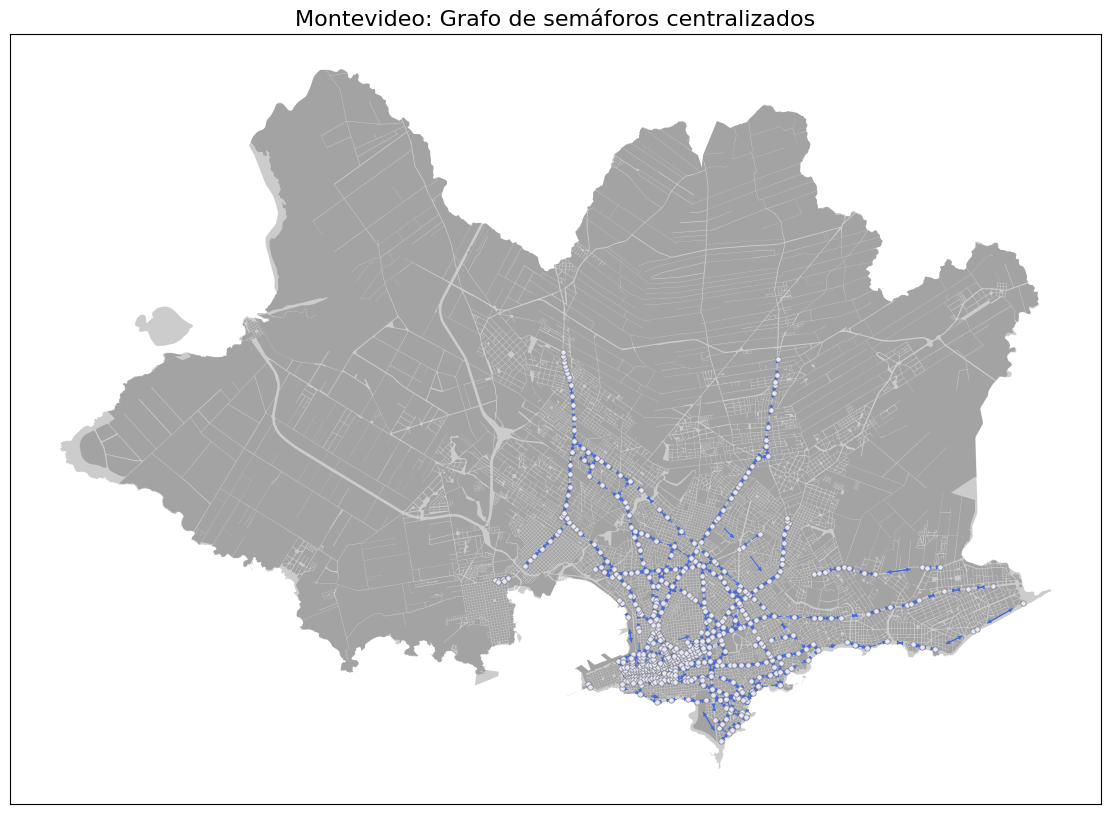

In [46]:
fig, ax= plt.subplots(figsize=(18,10))
geoBarrios.plot(linewidth = 0,alpha = 0.2, ax=ax, color = 'black')
geoManzanas.plot(alpha = 0.2,ax=ax, color = 'black')
# draw the nodes
nx.draw_networkx_nodes(G1,
                       pos = positions1,
                       node_size = 15,
                       node_color = 'lavender',
                       edgecolors='gray',
                       linewidths=0.5,
                       alpha = 1)
# draw the edges
nx.draw_networkx_edges(G1,
                       pos = positions1,
                       edge_color = 'royalblue',
                       alpha = 1,
                       width = 0.7,
                       arrowsize=5)

plt.title("Montevideo: Grafo de semáforos centralizados", size=16)
plt.show(fig,ax)

In [47]:
intersecc = pd.read_csv(ruta + 'MICRO.csv', sep=';')
intersecc

MICRO1                                             LUOGO1  Unnamed: 2
0       127  incroci periferici                            ...         NaN
1      1000  Frontend centrale                             ...         NaN
2      1001  Rambla y Ciudadela                            ...         NaN
3      1002  Rambla y Rio Negro                            ...         NaN
4      1003  Rambla y Morales                              ...         NaN
..      ...                                                ...         ...
613   12022  Bv Batlle y Ordonez y Sayago                  ...         NaN
614    4014  Magallanes y Lima                             ...         NaN
615   20060  Canelones y Ciudadela                         ...         NaN
616   23087  Maldonado y Jackson                           ...         NaN
617   24067  Canelones y Paullier                          ...         NaN

[618 rows x 3 columns]

In [48]:
intersecc = intersecc.loc[:,['MICRO1','LUOGO1']]
intersecc['MICRO1'] = intersecc['MICRO1'].astype(int)
intersecc.sort_values(by='MICRO1', ascending=False).head(30)

MICRO1                                             LUOGO1
140  1117091  Ref: 127091                                   ...
143  1117090  Ref: 127090                                   ...
41   1117081  Ref: 127081                                   ...
142  1117080  Ref: 127080                                   ...
141  1117070  Ref: 127070                                   ...
148  1051581  Ref: 61581                                    ...
160  1051580  Ref: 61580                                    ...
147  1051541  Ref: 61541                                    ...
159  1051540  Ref: 61540                                    ...
157  1051480  Ref: 61480                                    ...
158  1051440  Ref: 61440                                    ...
156  1051380  Ref: 61380                                    ...
145  1051281  Ref: 61281                                    ...
155  1051280  Ref: 61280                                    ...
144  1051241  Ref: 61241                                    ...
154  1051240  Ref: 61240                                    ...
481   997903  Ref: 7903                                     ...
490   997803  Ref: 7803                                     ...
493   997604  Ref: 7604                                     ...
482   997603  Ref: 7603                                     ...
475   997602  Ref: 7602                                     ...
478   997601  Ref: 7601                                     ...
480   997503  Ref: 7503                                     ...
492   997403  Ref: 7403                                     ...
491   997303  Ref: 7303                                     ...
479   997203  Ref: 7203                                     ...
476   997202  Ref: 7202                                     ...
477   997201  Ref: 7201                                     ...
512   990001  Ref: 1                                        ...
522    26014  Belloni y Camino Andaluz                      ...

In [49]:
intersecc.drop(intersecc[intersecc['MICRO1']>26014].index, inplace=True)
intersecc.rename(columns={'MICRO1':'id_nodo'},inplace=True)
intersecc.sort_values(by='id_nodo', ascending=False).head(5)

id_nodo                                             LUOGO1
522    26014  Belloni y Camino Andaluz                      ...
521    26013  Belloni y Carlos A Lopez                      ...
520    26012  Belloni y Aljaba                              ...
519    26011  Belloni y Boiso Lanza                         ...
518    26010  Belloni y Capitan Lacosta                     ...

La centralidad de intermediación (betweenness centrality) es una medida de la importancia de un nodo en una red.

Se calcula como la cantidad de veces que un nodo se encuentra en la ruta más corta entre dos nodos cualesquiera. En el contexto de redes de transporte, un nodo con alta centralidad de intermediación es aquel que es crucial para conectar diferentes partes de la red.

Hay que tener en cuenta que esto es un modelo de la realidad, ya que este grafo no representa adeuadamente la normativa de tránsito

In [50]:
bc = nx.betweenness_centrality(G)
#bc = nx.eigenvector_centrality(G, max_iter=500)
print(bc[127])
del bc[127] # borramos el dato del 127, ya que en esta representación este nodo no está
data = {'id_nodo': list(positions1.keys()),
        'betweenness': list(bc.values()),
        'geometry': [positions1[nodo] for nodo in positions1.keys()]}

geoCentralidad = pd.DataFrame(data)

geoCentralidad['geometry'] = geoCentralidad['geometry'].apply(lambda x: Point(x))
# Convertir a GeoDataFrame
geoCentralidad = gpd.GeoDataFrame(geoCentralidad, geometry='geometry',crs=4326)
geoCentralidad = geoCentralidad.merge(intersecc,on='id_nodo')
geoCentralidad  = geoCentralidad [["LUOGO1", "id_nodo", "betweenness", "geometry"]]
geoCentralidad.sort_values('betweenness',ascending=False).head(10)
#geoCentralidad[geoCentralidad['id_nodo']//1000==1].sort_values('betweenness',ascending=False).head(10)

#para revisar según corredores, modificar la x: /1000==x].sort_values en el código
# 1 - Rambla
# 6 - Av. Italia
# 7 - Bv. Artigas
# 9 - Gral. Flores
# 10 - 8 de Octubre
# 12 - Bv. Batlle y Ordóñez
# 13 - Agraciada

0.0


LUOGO1  id_nodo  betweenness  \
209  Rivera y Pastoriza, Llambi                    ...    11004     0.184996   
202  8 de Octubre y Comandante Braga               ...    10022     0.165579   
203  Garibaldi y 8 de Octubre, Urquiza             ...    10023     0.164893   
523  La Paz y Fernandez Crespo                     ...    23125     0.164342   
524  18 de Julio y Arenal Grande                   ...    24001     0.158319   
206  Rivera y Ponce                                ...    11001     0.153102   
90   Centenario y Jaime Cibils, Brito Foresti      ...     6004     0.149824   
357  18 de Julio y Plaza Independencia             ...    20001     0.143353   
174  Gral Flores e Isaacs                          ...     9022     0.132301   
543  Canelones y Pablo de Maria                    ...    24063     0.132092   

                        geometry  
209   POINT (-56.15128 -34.9031)  
202  POINT (-56.15833 -34.88719)  
203  POINT (-56.16064 -34.88908)  
523   POINT (-56.1804 -34.89675)  
524  POINT (-56.17377 -34.90105)  
206  POINT (-56.16137 -34.90284)  
90   POINT (-56.15368 -34.88778)  
357  POINT (-56.19867 -34.90645)  
174   POINT (-56.1467 -34.83572)  
543  POINT (-56.17081 -34.90725)

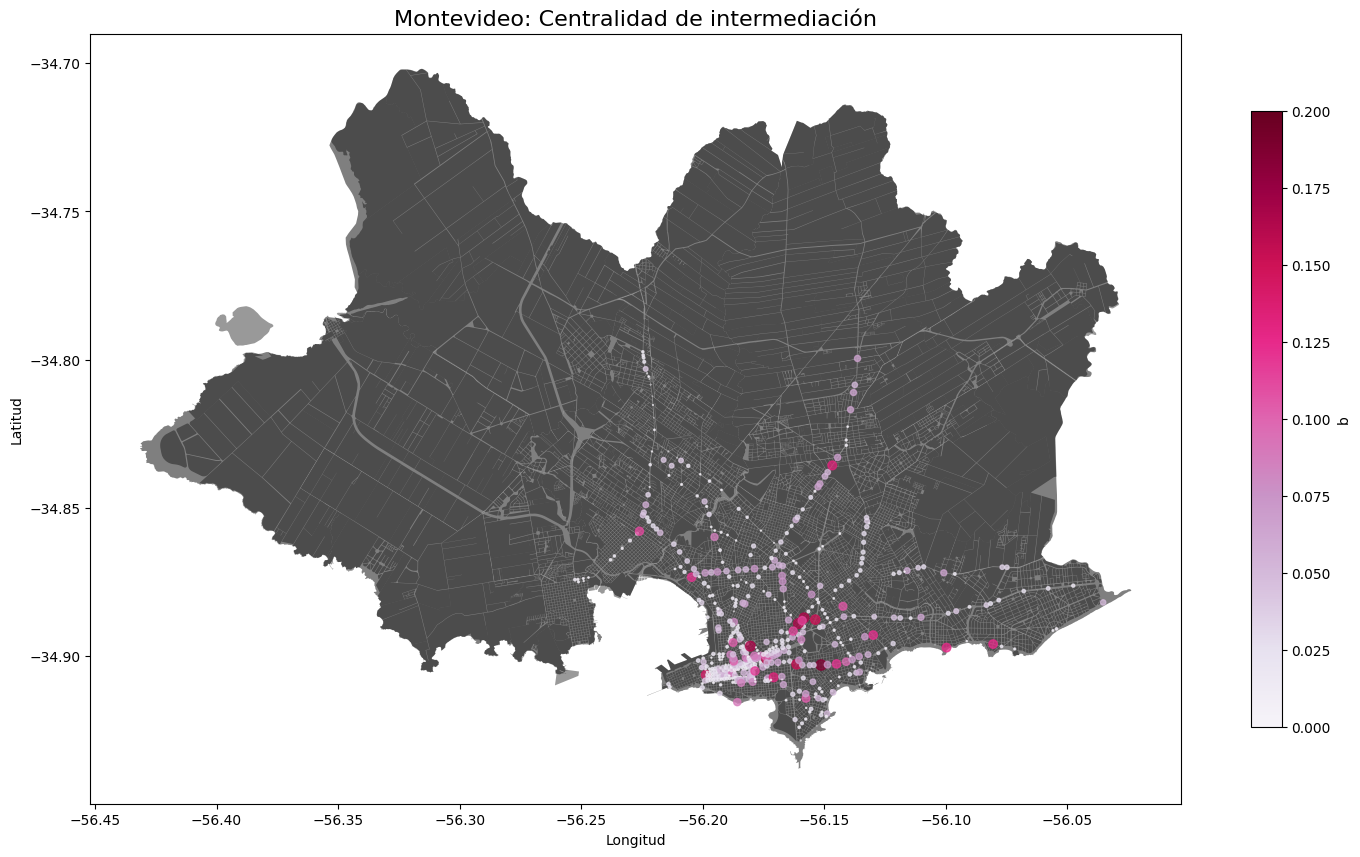

In [51]:
import contextily as ctx
fig, ax = plt.subplots(figsize=(18, 10))
geoBarrios.plot(linewidth = 0,alpha = 0.5, ax=ax, color = 'black')
geoManzanas.plot(alpha = 0.4,ax=ax, color = 'black')
geoCentralidad.plot(ax=ax, markersize=geoCentralidad['betweenness']*300, alpha=0.75, column='betweenness', legend=True, cmap='PuRd',categorical=False, vmin=0,vmax=0.2, legend_kwds={"label": "b","shrink":0.8})
plt.title("Montevideo: Centralidad de intermediación", size=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

##Siniestros

In [52]:
""" Detectamos que el archivo en ciertos lugares tenía doble coma (,,).
Esto es un problema ya que la coma es el separador que da estructura al archivo, por lo que es necesario quitarlas antes de cargarlo a un dataframe.
"""
reading_file = open(ruta + 'datosabiertos.txt', "r")
new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = stripped_line.replace(",,", ",")
    new_file_content += new_line +"\n"
reading_file.close()

writing_file = open(ruta + 'siniestros_ok.txt', "w")
writing_file.write(new_file_content)
writing_file.close()

siniestros = pd.read_csv(ruta + 'siniestros_ok.txt', sep=",",index_col=False)
siniestros = quitar_espacios_columnas(siniestros)

print(len(siniestros))

siniestros['Fecha'] = pd.to_datetime(siniestros['Fecha'], format='%d/%m/%Y', errors='raise')
siniestros['Hora'] = siniestros['Hora'].astype(int)
siniestros[['X','Y']] = siniestros[['X','Y']].astype(int)
# quitamos las columnas que no son relevantes para nuestro estudio
siniestros.drop(columns=['Usa_cinturón','Usa_casco','Edad','Tipo_de_Vehiculo','Localidad','Departamento','Día_de_la_semana','Zona','Sexo','fixed'],inplace=True)
print(len(siniestros))
print(siniestros.dtypes)

siniestros

13268
13268
Fecha                datetime64[ns]
Rol                          object
Calle                        object
Tipo_de_resultado            object
Tipo_de_siniestro            object
Hora                          int64
X                             int64
Y                             int64
dtype: object


Fecha        Rol                           Calle Tipo_de_resultado  \
0     2023-05-30  CONDUCTOR      BOULEVARD_APARICIO_SARAVIA             ILESO   
1     2023-05-30  CONDUCTOR  AVENIDA_GENERAL_EUGENIO_GARZON             ILESO   
2     2023-05-30  CONDUCTOR  AVENIDA_GENERAL_EUGENIO_GARZON             ILESO   
3     2023-05-30  CONDUCTOR       RAMBLA_REPUBLICA_DEL_PERU       HERIDO_LEVE   
4     2023-05-30  CONDUCTOR                PRESIDENTE_BERRO       HERIDO_LEVE   
...          ...        ...                             ...               ...   
13263 2023-05-30   PASAJERO                       SIN_DATOS       HERIDO_LEVE   
13264 2023-05-30  CONDUCTOR                       SIN_DATOS      HERIDO_GRAVE   
13265 2023-05-30  CONDUCTOR                       SIN_DATOS       HERIDO_LEVE   
13266 2023-05-30  CONDUCTOR         AVENIDA_OCHO_DE_OCTUBRE             ILESO   
13267 2023-05-30     PEATÓN         AVENIDA_OCHO_DE_OCTUBRE       HERIDO_LEVE   

              Tipo_de_siniestro  Hora       X        Y  
0      COLISIÓN_ENTRE_VEHÍCULOS    12  576675  6144960  
1      COLISIÓN_ENTRE_VEHÍCULOS    14  571025  6148525  
2      COLISIÓN_ENTRE_VEHÍCULOS    14  571025  6148525  
3      COLISIÓN_ENTRE_VEHÍCULOS    14  578115  6136495  
4      COLISIÓN_ENTRE_VEHÍCULOS    13  576460  6138690  
...                         ...   ...     ...      ...  
13263  COLISIÓN_ENTRE_VEHÍCULOS    10  567060  6152390  
13264  COLISIÓN_ENTRE_VEHÍCULOS    10  567060  6152390  
13265  COLISIÓN_ENTRE_VEHÍCULOS    10  567060  6152390  
13266       ATROPELLO_DE_PEATÓN    12  577865  6140010  
13267       ATROPELLO_DE_PEATÓN    12  577865  6140010  

[13268 rows x 8 columns]

Atropello de peatón es el segundo tipo de siniestro con más registros

In [53]:
siniestros.groupby(['Tipo_de_siniestro'])['Tipo_de_siniestro'].count().sort_values(ascending=False)

Tipo_de_siniestro
COLISIÓN_ENTRE_VEHÍCULOS             10311
ATROPELLO_DE_PEATÓN                   1510
CAÍDA                                  713
DESPISTE                               438
COLISIÓN_CON_OBSTÁCULO_EN_CALZADA      214
ATROPELLO_DE_ANIMALES                   82
Name: Tipo_de_siniestro, dtype: int64

Si bien existe la categoría donde los peatones son los principales protagonistas (Atropello de peatón) no es el único caso en el que están involucrados, como vemos a continuación:

In [54]:
sin_peat= siniestros[(siniestros["Rol"]=="PEATÓN")|(siniestros["Rol"]=="PEATON")].groupby(by='Tipo_de_siniestro')['Rol'].count().sort_values(ascending=False)
print(sin_peat)
print(f"Total: {sin_peat.sum()} siniestros")

Tipo_de_siniestro
ATROPELLO_DE_PEATÓN                  735
COLISIÓN_ENTRE_VEHÍCULOS             141
CAÍDA                                 45
DESPISTE                              20
ATROPELLO_DE_ANIMALES                  4
COLISIÓN_CON_OBSTÁCULO_EN_CALZADA      3
Name: Rol, dtype: int64
Total: 948 siniestros


<Axes: title={'center': 'Porcentaje de siniestros de peatones por categoria'}, ylabel=' '>

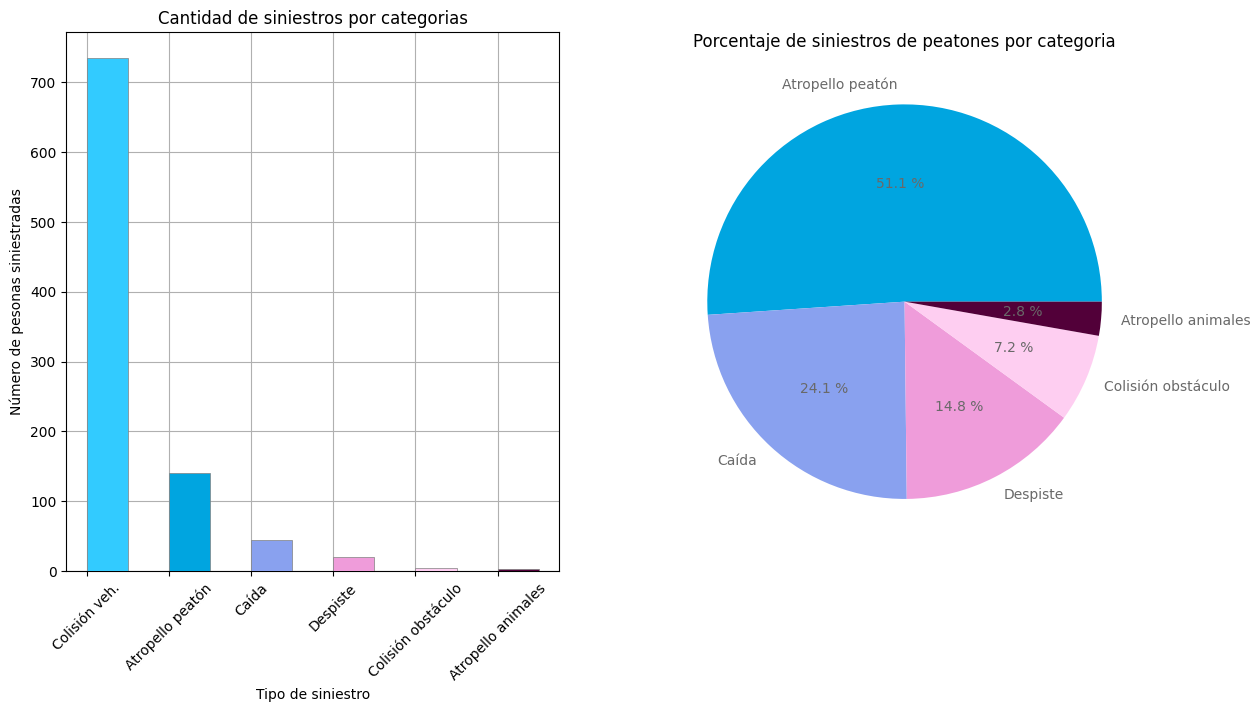

In [55]:
siniestros_sin_veh = siniestros[siniestros['Tipo_de_siniestro'] != 'COLISIÓN_ENTRE_VEHÍCULOS']
siniestros_sin_veh = siniestros_sin_veh.groupby(['Tipo_de_siniestro'])['Tipo_de_siniestro'].count().sort_values(ascending=False)

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize = (14,7))
Colores = ['#32CBFF','#00A5E0','#89A1EF','#EF9CDA','#FECEF1','#520039']

ax1.title.set_text("Cantidad de siniestros por categorias")
sin_peat.plot(grid=True,kind='bar', align='edge',xlabel = 'Tipo de siniestro', ylabel = 'Número de pesonas siniestradas', color=Colores, ax=ax1, zorder = 3, edgecolor='gray',
linewidth=0.5)
categorias = ['Colisión veh.','Atropello peatón','Caída','Despiste', 'Colisión obstáculo','Atropello animales']

ticks = ax1.set_xticklabels(categorias, rotation = 45)
ax2.title.set_text("Porcentaje de siniestros de peatones por categoria")
siniestros_sin_veh.plot(kind='pie',labels=categorias[1:], ax=ax2, colors=Colores[1:], autopct="%0.1f %%", ylabel = ' ',textprops = {'color':'dimgray'})


Text(0, 0.5, 'Cantidad de siniestros')

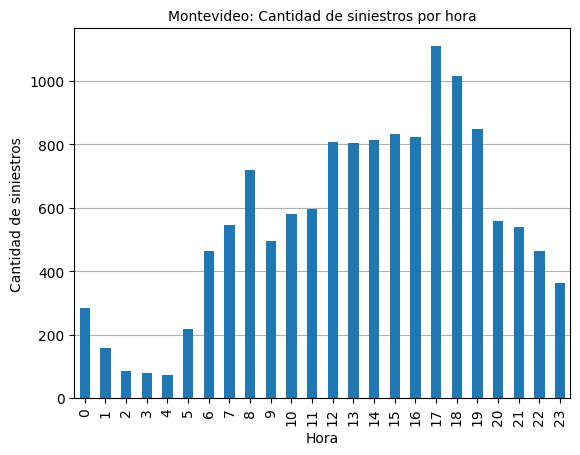

In [56]:
siniestros_por_hora = siniestros.groupby(['Hora'])['Hora'].count()
#define plot
fig, ax = plt.subplots()

#create bar plot
siniestros_por_hora.plot(kind='bar', ax=ax, zorder=2)
ax.grid(axis='y',zorder=0)
plt.title("Montevideo: Cantidad de siniestros por hora", size=10)
plt.ylabel('Cantidad de siniestros')

In [57]:
siniestros

Fecha        Rol                           Calle Tipo_de_resultado  \
0     2023-05-30  CONDUCTOR      BOULEVARD_APARICIO_SARAVIA             ILESO   
1     2023-05-30  CONDUCTOR  AVENIDA_GENERAL_EUGENIO_GARZON             ILESO   
2     2023-05-30  CONDUCTOR  AVENIDA_GENERAL_EUGENIO_GARZON             ILESO   
3     2023-05-30  CONDUCTOR       RAMBLA_REPUBLICA_DEL_PERU       HERIDO_LEVE   
4     2023-05-30  CONDUCTOR                PRESIDENTE_BERRO       HERIDO_LEVE   
...          ...        ...                             ...               ...   
13263 2023-05-30   PASAJERO                       SIN_DATOS       HERIDO_LEVE   
13264 2023-05-30  CONDUCTOR                       SIN_DATOS      HERIDO_GRAVE   
13265 2023-05-30  CONDUCTOR                       SIN_DATOS       HERIDO_LEVE   
13266 2023-05-30  CONDUCTOR         AVENIDA_OCHO_DE_OCTUBRE             ILESO   
13267 2023-05-30     PEATÓN         AVENIDA_OCHO_DE_OCTUBRE       HERIDO_LEVE   

              Tipo_de_siniestro  Hora       X        Y  
0      COLISIÓN_ENTRE_VEHÍCULOS    12  576675  6144960  
1      COLISIÓN_ENTRE_VEHÍCULOS    14  571025  6148525  
2      COLISIÓN_ENTRE_VEHÍCULOS    14  571025  6148525  
3      COLISIÓN_ENTRE_VEHÍCULOS    14  578115  6136495  
4      COLISIÓN_ENTRE_VEHÍCULOS    13  576460  6138690  
...                         ...   ...     ...      ...  
13263  COLISIÓN_ENTRE_VEHÍCULOS    10  567060  6152390  
13264  COLISIÓN_ENTRE_VEHÍCULOS    10  567060  6152390  
13265  COLISIÓN_ENTRE_VEHÍCULOS    10  567060  6152390  
13266       ATROPELLO_DE_PEATÓN    12  577865  6140010  
13267       ATROPELLO_DE_PEATÓN    12  577865  6140010  

[13268 rows x 8 columns]

In [58]:
geom = utm.to_latlon(siniestros['X'],siniestros['Y'],21,"H")
geom

(0       -34.834766
 1       -34.803031
 2       -34.803031
 3       -34.910982
 4       -34.891317
            ...    
 13263   -34.768449
 13264   -34.768449
 13265   -34.768449
 13266   -34.879308
 13267   -34.879308
 Length: 13268, dtype: float64,
 0       -56.161434
 1       -56.223522
 2       -56.223522
 3       -56.144897
 4       -56.163213
            ...    
 13263   -56.267175
 13264   -56.267175
 13265   -56.267175
 13266   -56.147961
 13267   -56.147961
 Length: 13268, dtype: float64)

In [59]:
# Esto devuelve una tupla con dos elementos que son listas de las coordenadas, necesitamos desempacarla
(geom_lat,geom_lon) = geom
# Convierte el DataFrame en un GeoDataFrame
siniestros['geometry'] = [Point(x, y) for x, y in zip(geom_lon, geom_lat)]
geoSiniestros = gpd.GeoDataFrame(siniestros, geometry='geometry',crs=4326)
geoSiniestros

Fecha        Rol                           Calle Tipo_de_resultado  \
0     2023-05-30  CONDUCTOR      BOULEVARD_APARICIO_SARAVIA             ILESO   
1     2023-05-30  CONDUCTOR  AVENIDA_GENERAL_EUGENIO_GARZON             ILESO   
2     2023-05-30  CONDUCTOR  AVENIDA_GENERAL_EUGENIO_GARZON             ILESO   
3     2023-05-30  CONDUCTOR       RAMBLA_REPUBLICA_DEL_PERU       HERIDO_LEVE   
4     2023-05-30  CONDUCTOR                PRESIDENTE_BERRO       HERIDO_LEVE   
...          ...        ...                             ...               ...   
13263 2023-05-30   PASAJERO                       SIN_DATOS       HERIDO_LEVE   
13264 2023-05-30  CONDUCTOR                       SIN_DATOS      HERIDO_GRAVE   
13265 2023-05-30  CONDUCTOR                       SIN_DATOS       HERIDO_LEVE   
13266 2023-05-30  CONDUCTOR         AVENIDA_OCHO_DE_OCTUBRE             ILESO   
13267 2023-05-30     PEATÓN         AVENIDA_OCHO_DE_OCTUBRE       HERIDO_LEVE   

              Tipo_de_siniestro  Hora       X        Y  \
0      COLISIÓN_ENTRE_VEHÍCULOS    12  576675  6144960   
1      COLISIÓN_ENTRE_VEHÍCULOS    14  571025  6148525   
2      COLISIÓN_ENTRE_VEHÍCULOS    14  571025  6148525   
3      COLISIÓN_ENTRE_VEHÍCULOS    14  578115  6136495   
4      COLISIÓN_ENTRE_VEHÍCULOS    13  576460  6138690   
...                         ...   ...     ...      ...   
13263  COLISIÓN_ENTRE_VEHÍCULOS    10  567060  6152390   
13264  COLISIÓN_ENTRE_VEHÍCULOS    10  567060  6152390   
13265  COLISIÓN_ENTRE_VEHÍCULOS    10  567060  6152390   
13266       ATROPELLO_DE_PEATÓN    12  577865  6140010   
13267       ATROPELLO_DE_PEATÓN    12  577865  6140010   

                          geometry  
0      POINT (-56.16143 -34.83477)  
1      POINT (-56.22352 -34.80303)  
2      POINT (-56.22352 -34.80303)  
3       POINT (-56.1449 -34.91098)  
4      POINT (-56.16321 -34.89132)  
...                            ...  
13263  POINT (-56.26717 -34.76845)  
13264  POINT (-56.26717 -34.76845)  
13265  POINT (-56.26717 -34.76845)  
13266  POINT (-56.14796 -34.87931)  
13267  POINT (-56.14796 -34.87931)  

[13268 rows x 9 columns]

Text(0.5, 1.0, 'Montevideo: Siniestros por tipo')

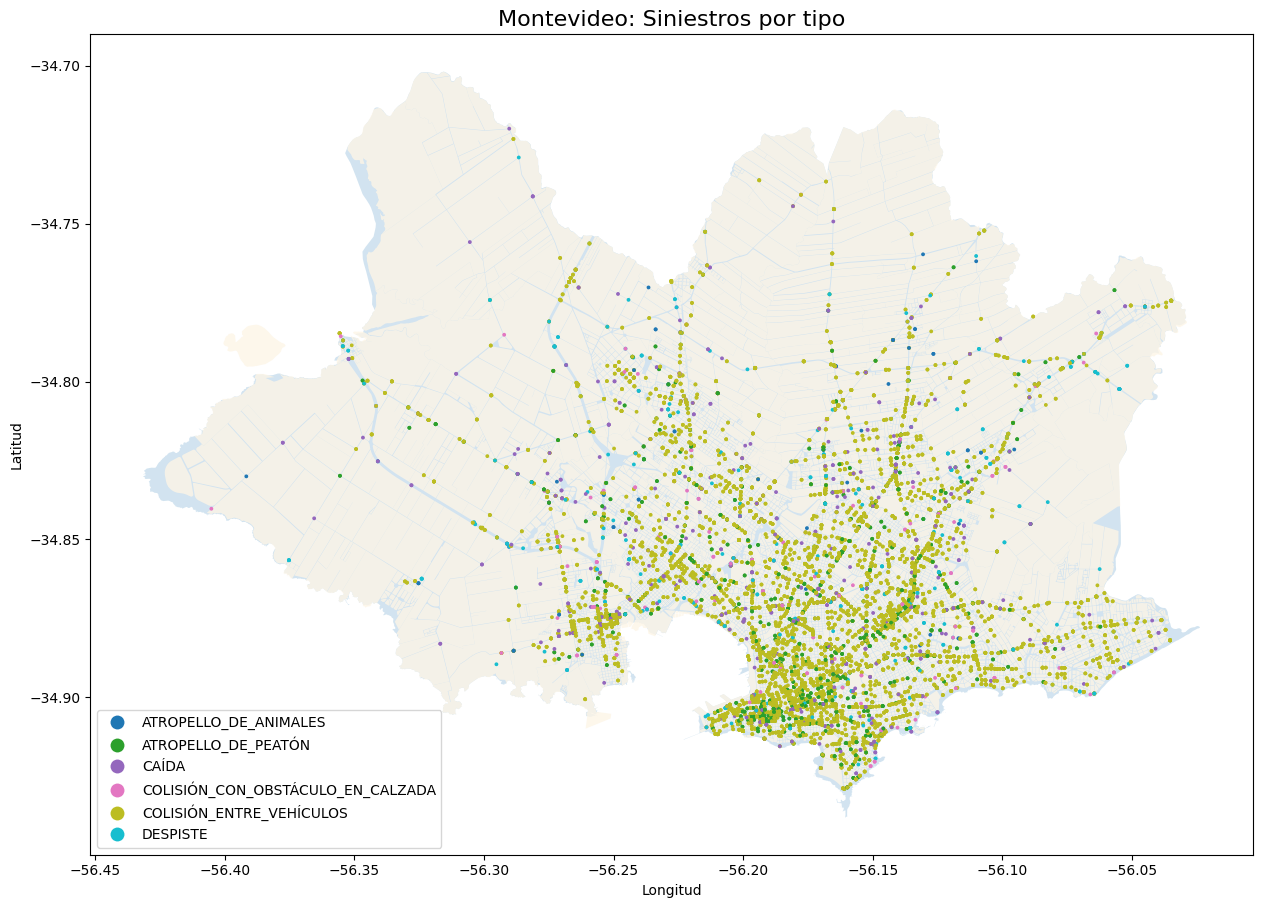

In [60]:
fig, ax= plt.subplots(figsize=(15,15))
geoBarrios.plot(linewidth = 0,alpha = 0.2, ax=ax)
geoManzanas.plot(color = 'oldlace',alpha = 0.8,ax=ax)
geoSiniestros.plot(column='Tipo_de_siniestro',markersize=3,ax=ax,legend=True,legend_kwds={'loc':'lower left'})
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title("Montevideo: Siniestros por tipo", size=16)

In [61]:
peatones_en_siniestros = geoSiniestros[geoSiniestros['Rol']=='PEATÓN']
siniestros_con_peatones = geoSiniestros[(geoSiniestros['Rol']=='PEATÓN')|(geoSiniestros['Tipo_de_siniestro']=='ATROPELLO_DE_PEATÓN')]
print(f"Peatones en siniestros: {len(peatones_en_siniestros)}")
print(f"Peatones involucrados en todos los tipos de siniestros: {len(siniestros_con_peatones)}")
#Nos aseguramos que no hayan valores duplicados en ambos filtrados que se hacen en siniestros_con_peatones
with warnings.catch_warnings():
  warnings.simplefilter(action='ignore')
  siniestros_con_peatones.drop_duplicates(inplace=True)
print(f"Luego del filtro: {len(siniestros_con_peatones)} registros")

Peatones en siniestros: 948
Peatones involucrados en todos los tipos de siniestros: 1723
Luego del filtro: 1621 registros


Text(0.5, 1.0, 'Montevideo: siniestros que involucran peatones')

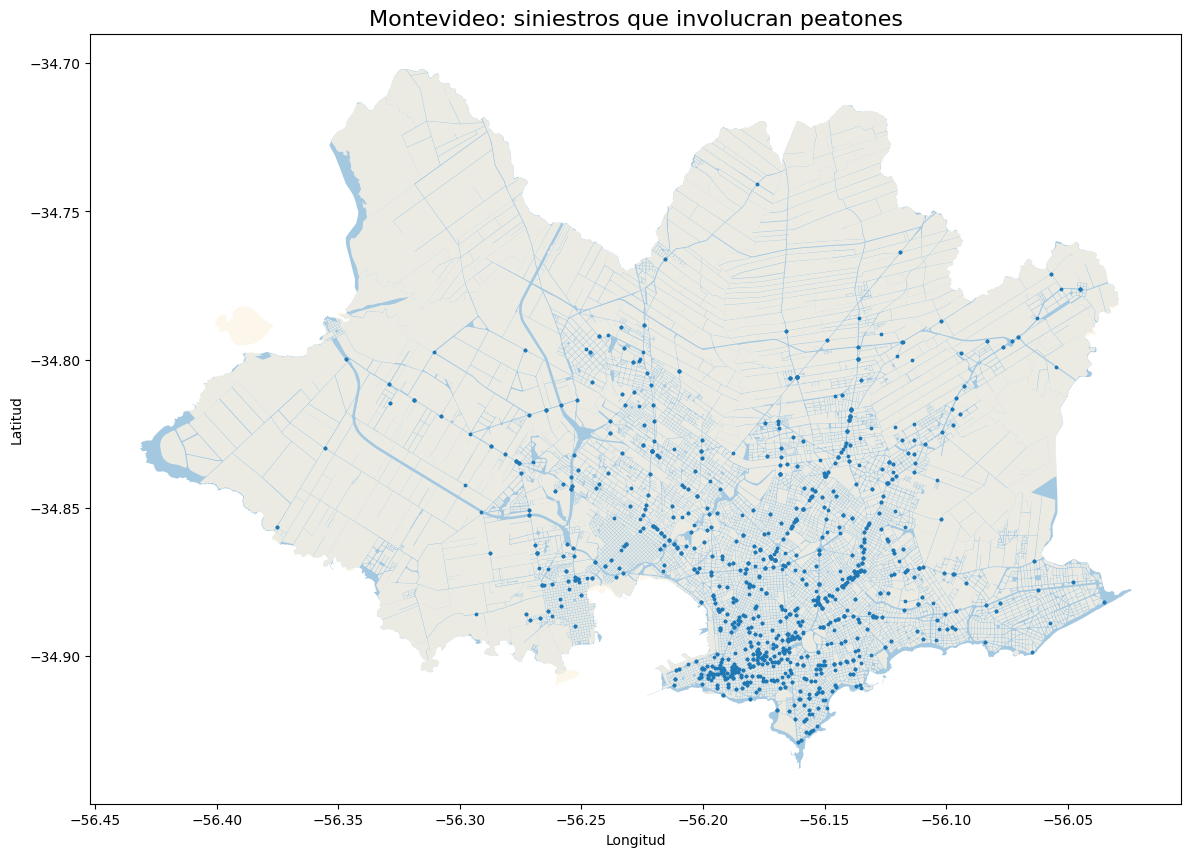

In [62]:
fig, ax= plt.subplots(figsize=(18,10))
geoBarrios.plot(linewidth = 0,alpha = 0.4, ax=ax)
geoManzanas.plot(color = 'oldlace',alpha = 0.8,ax=ax)
siniestros_con_peatones.plot(marker='o',markersize=3,ax=ax,legend=True, zorder=3)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title("Montevideo: siniestros que involucran peatones", size=16)

In [63]:
points = [[point.xy[1][0], point.xy[0][0]] for point in siniestros_con_peatones.geometry]

In [72]:
import folium.utilities
m = folium.Map(location=[siniestros_con_peatones.geometry.y.mean()+0.01, siniestros_con_peatones.geometry.x.mean()], zoom_start=12)
fig = Figure(width=1400, height=550,title= '')
title_html='''<h3 align="center" style="font-size:24px; color:navy; font-family:Arial;">Montevideo: peatones involucrados en siniestros</h3>
'''
fig.get_root().html.add_child(Element(title_html))

HeatMap(points,gradient = {'0.75': 'navy', '0.875': 'purple', '1.0': 'yellow'},min_opacity=0.5,radius=20).add_to(m)
fig.add_child(m)
fig.save(ruta + 'Mapa_siniestros_peatones_mvd.html') #guardamos el mapa como html
fig

# Cruzando datos

In [73]:
geoParadas = geoParadas.to_crs(epsg=32721)
distances = geoParadas['geometry'].distance(geoParadas['geometry'].shift())
min_distance = distances[distances > 0].min()
print(f"Mínima distancia entre paradas: {min_distance:.2f} metros")

Mínima distancia entre paradas: 7.83 metros


In [74]:
# Para medir distancias se debe cambiar de proyección a UTM (epsg=32721)
siniestros_con_peatones = siniestros_con_peatones.to_crs(epsg=32721)

geoParadas['bufer'] = geoParadas.geometry.buffer(25) #hacemos una busqueda dentro de 25 m de la parada

# Contar siniestros dentro de cada buffer
# Inicializar una lista para almacenar los conteos
conteos_siniestros = []

for cruce in geoParadas.bufer:
    # Usar 'within' para verificar si un siniestro está dentro del buffer de una parada
    siniestros_en_cruce = siniestros_con_peatones.within(cruce)
    # Sumar los True (siniestros dentro del cruce)
    conteo = sum(siniestros_en_cruce)
    conteos_siniestros.append(conteo)

# Agregar el conteo de siniestros como una nueva columna en el GeoDataFrame de paradas
geoParadas['siniestros'] = conteos_siniestros
geoParadas['siniestros'] = geoParadas['siniestros'].astype(int)
# Ahora geoParadas tiene una nueva columna 'siniestros' con el número de siniestros
# dentro de un radio de 20m para cada cruce
#geoParadas.sort_values('siniestros',ascending=False).head(10)
geoParadas.drop(geoParadas[geoParadas['siniestros'] == 0].index, inplace=True)

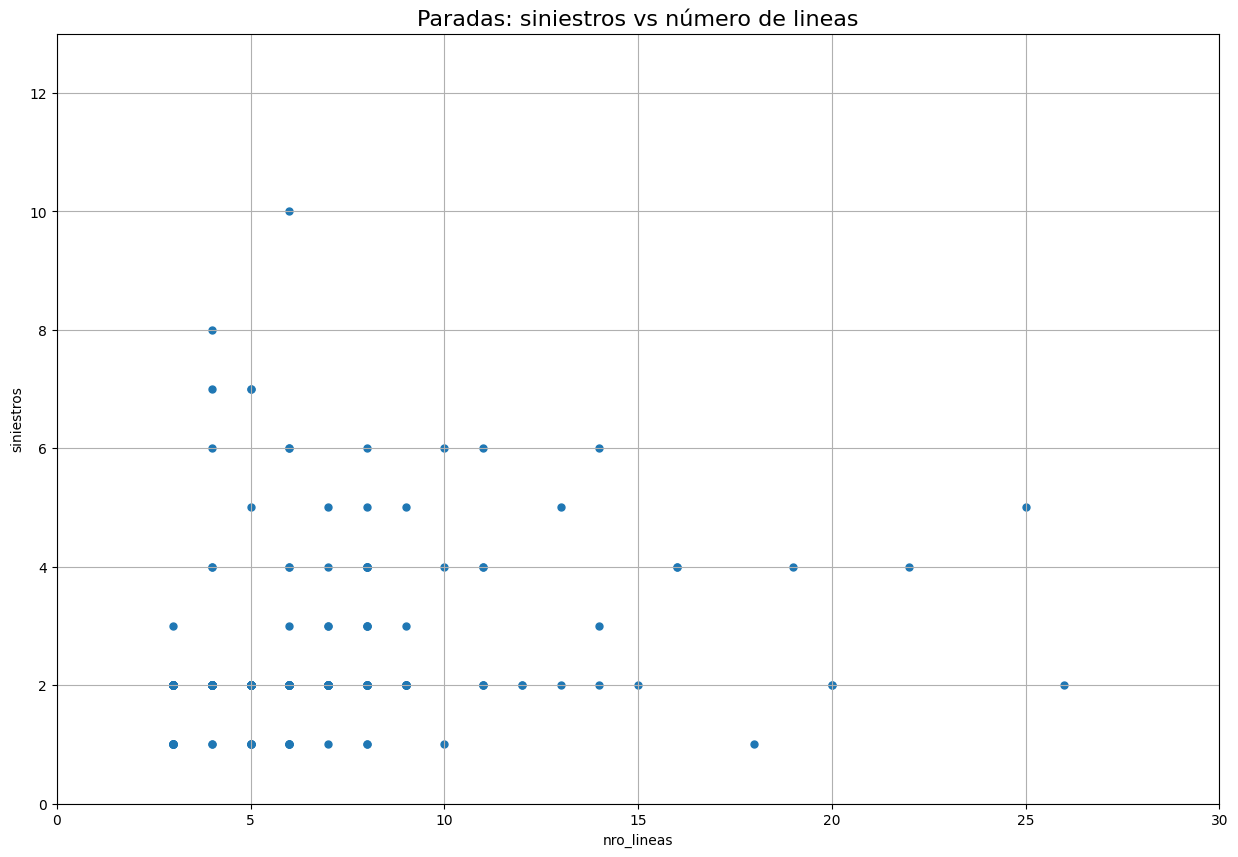

In [75]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set_xlim(left=0,right=30)
ax.set_ylim(bottom=0, top=13)
geoParadas.plot.scatter( x='nro_lineas', y='siniestros', s=25, ax= ax)
plt.title("Paradas: siniestros vs número de lineas", size=16)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Inercias')

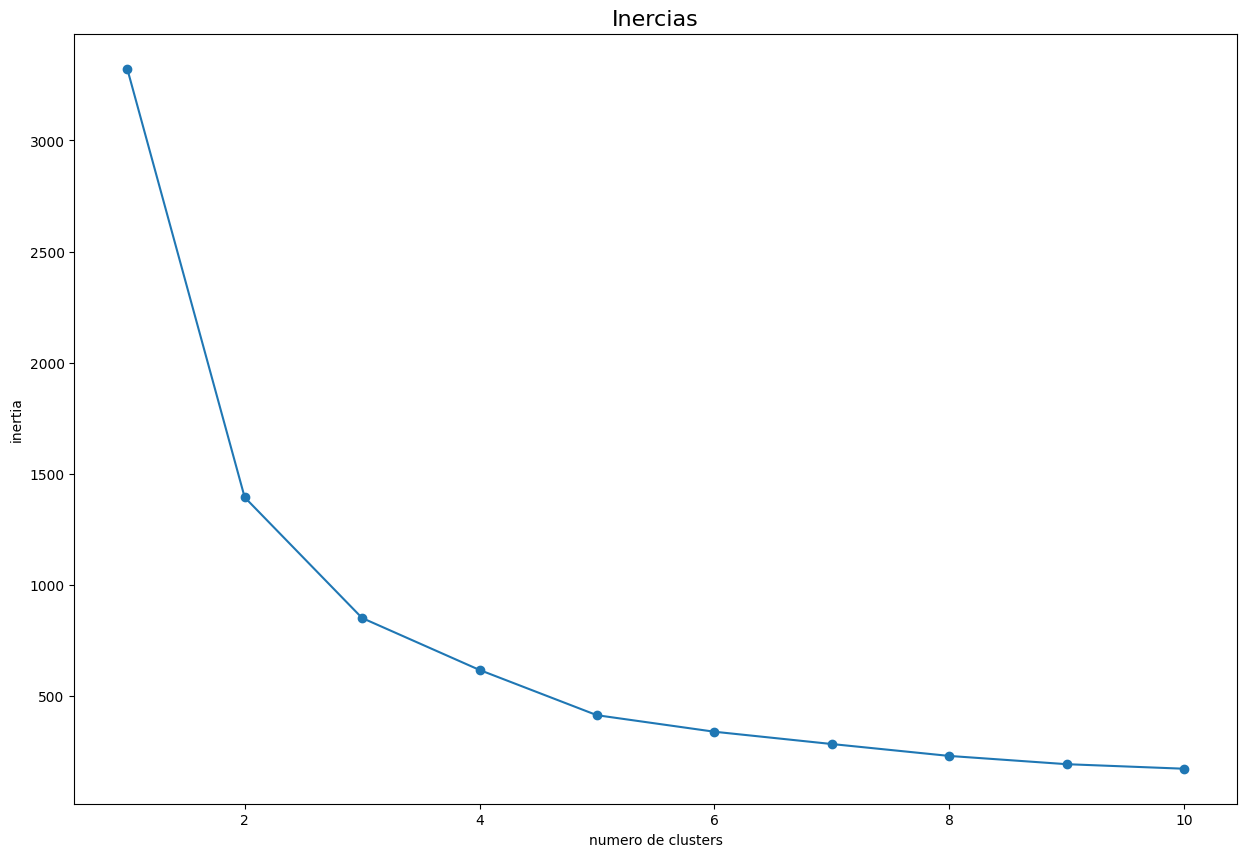

In [76]:
# Calcular la suma de distancias cuadradas inter-cluster (inertia) para diferentes cantidades de clusters
inertia_values = []
cantidad_clusters = range(1, 11) # Probamos 1 a 10 clusters

for k in cantidad_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(geoParadas[["nro_lineas", "siniestros"]])
    inertia_values.append(kmeans.inertia_)

# Metodo del codo
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(cantidad_clusters, inertia_values, marker='o')
ax.set_xlabel("numero de clusters")
ax.set_ylabel("inertia")
plt.title("Paradas: siniestros vs numero de lineas", size=16)

plt.title("Inercias", size=16)

Text(0.5, 1.0, 'Paradas: clústers de siniestros vs número de líneas')

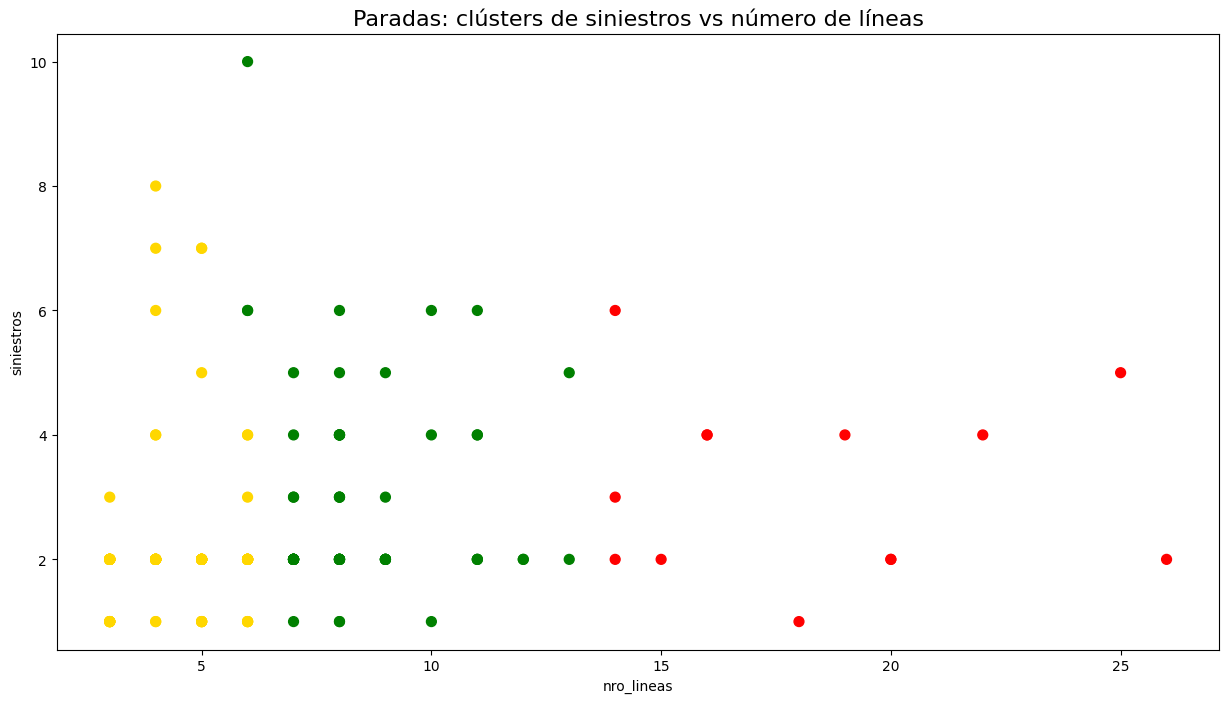

In [77]:
# Especificamos el numero de clusters
n_clusters = 3
# Ajustamos el modelo a los datos
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
geoParadas['cluster'] = kmeans.fit_predict(geoParadas[['nro_lineas', 'siniestros']])

fig, ax = plt.subplots(figsize=(15, 8))
colores={1:"red",2:"green",0:"gold"} #Defino un color para cada cluster
geoParadas.plot(kind="scatter",
               x="nro_lineas",
               y="siniestros",
               s=50,
               c=geoParadas['cluster'].map(colores),  # El color se define por el cluster al que pertenece el punto
               colorbar=False,
               legend=True,
               ax=ax)
plt.title("Paradas: clústers de siniestros vs número de líneas", size=16)

In [78]:
geoParadas.sort_values('siniestros', ascending=False)

paradas  nro_lineas  area_km                   nombbarr  nrobarrio  \
1487     3834           6    2.279                     CORDON          4   
779      2324           4    1.966                  ITUZAINGO         22   
969      2782           4    2.376   MERCADO MODELO - BOLIVAR         25   
756      2299           5    5.380                      MANGA         62   
966      2779           5    2.376   MERCADO MODELO - BOLIVAR         25   
...       ...         ...      ...                        ...        ...   
798      2405           5    0.888                LA FIGURITA         45   
1476     3806           6    0.843               JACINTO VERA         44   
1374     3469           3    3.375  PQUE. BATLLE - V. DOLORES         10   
745      2287           6   62.811       MANGA - TOLEDO CHICO         32   
1150     3068           8    3.375  PQUE. BATLLE - V. DOLORES         10   

                            geometry  \
1487  POINT (575210.939 6137815.087)   
779    POINT (577729.465 6144422.09)   
969   POINT (575839.885 6141296.318)   
756   POINT (578719.132 6146947.294)   
966   POINT (575798.711 6141311.408)   
...                              ...   
798    POINT (575214.299 6140705.56)   
1476  POINT (575209.897 6140679.045)   
1374  POINT (578051.775 6138653.807)   
745   POINT (579049.159 6150377.226)   
1150   POINT (577869.67 6138184.608)   

                                                  bufer  siniestros  cluster  
1487  POLYGON ((575235.939 6137815.087, 575235.819 6...          10        2  
779   POLYGON ((577754.465 6144422.09, 577754.345 61...           8        0  
969   POLYGON ((575864.885 6141296.318, 575864.765 6...           7        0  
756   POLYGON ((578744.132 6146947.294, 578744.011 6...           7        0  
966   POLYGON ((575823.711 6141311.408, 575823.591 6...           7        0  
...                                                 ...         ...      ...  
798   POLYGON ((575239.299 6140705.56, 575239.178 61...           1        0  
1476  POLYGON ((575234.897 6140679.045, 575234.777 6...           1        0  
1374  POLYGON ((578076.775 6138653.807, 578076.655 6...           1        0  
745   POLYGON ((579074.159 6150377.226, 579074.039 6...           1        0  
1150  POLYGON ((577894.67 6138184.608, 577894.55 613...           1        2  

[171 rows x 9 columns]

In [79]:
geoParadas['indice_siniestros'] = geoParadas['siniestros']/(geoParadas['nro_lineas'] + geoParadas['siniestros'])
geoParadas.groupby("nombbarr")['siniestros'].agg('sum').sort_values(ascending=False).head(10)

nombbarr
UNION                        61
PQUE. BATLLE - V. DOLORES    30
CORDON                       26
MERCADO MODELO - BOLIVAR     23
PASO DE LA ARENA             20
CENTRO                       18
PIEDRAS BLANCAS              17
CERRO                        15
ITUZAINGO                    12
POCITOS                      12
Name: siniestros, dtype: int64

In [80]:
# Vamos a intersectar todas las paradas a menos de 25m de cada semaforo y obtener el máximo indice de siniestros de ellas
from geopandas.tools import sjoin
geoParadas = geoParadas.to_crs(epsg=32721)
geoSemaforos = geoSemaforos.to_crs(epsg=32721)
buffers_semaforos = geoSemaforos.geometry.buffer(25)
geoSemaforos_buffers = gpd.GeoDataFrame(geometry=buffers_semaforos)
geoSemaforos_buffers.crs = geoSemaforos.crs

#sjoin para encontrar todas las paradas dentro de cada buffer de semáforo
paradas_dentro_buffers = sjoin(geoParadas, geoSemaforos_buffers, how='inner')

#maximo de ind_siniestros por cada semáforo
max_siniestros_por_semaforo = paradas_dentro_buffers.groupby('index_right')['indice_siniestros'].max()
geoSemaforos['ind_siniestros'] = 0

# Luego, actualizamos esta columna con los valores calculados
for idx, suma in max_siniestros_por_semaforo.items():
    geoSemaforos.at[idx, 'ind_siniestros'] = suma

<ipython-input-80-622a5920be17>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  geoSemaforos.at[idx, 'ind_siniestros'] = suma


In [81]:
geoSemaforos.rename(columns={'RS1Id':'id_nodo'}, inplace=True)
# geoCentralidad = geoCentralidad.merge(geoSemaforos,on =' id_nodo')
geoCentralidad = pd.merge(geoCentralidad,geoSemaforos[['id_nodo','ind_siniestros']],on='id_nodo', how='left')

In [82]:
geoCentralidad

LUOGO1  id_nodo  betweenness  \
0    Rambla y Ciudadela                            ...     1001     0.026118   
1    Rambla y Rio Negro                            ...     1002     0.030527   
2    Rambla y Morales                              ...     1003     0.002395   
3    Rambla y Jackson, Eduardo Acevedo             ...     1004     0.000000   
4    Rambla y Sarmiento                            ...     1005     0.000004   
..                                                 ...      ...          ...   
573  Belloni y Capitan Lacosta                     ...    26010     0.062363   
574  Belloni y Boiso Lanza                         ...    26011     0.049647   
575  Belloni y Aljaba                              ...    26012     0.000000   
576  Belloni y Carlos A Lopez                      ...    26013     0.000000   
577  Belloni y Camino Andaluz                      ...    26014     0.064445   

                        geometry  ind_siniestros  
0    POINT (-56.20015 -34.91072)             0.0  
1    POINT (-56.19297 -34.91267)             0.0  
2    POINT (-56.18024 -34.91471)             0.0  
3     POINT (-56.17298 -34.9144)             0.0  
4    POINT (-56.16951 -34.91545)             0.0  
..                           ...             ...  
573  POINT (-56.13797 -34.81112)             0.0  
574  POINT (-56.13743 -34.80853)             0.0  
575  POINT (-56.13717 -34.80732)             0.0  
576  POINT (-56.13662 -34.80513)             0.0  
577  POINT (-56.13632 -34.79963)             0.0  

[578 rows x 5 columns]

In [83]:
geoCentralidad['jerarquia'] =geoCentralidad['ind_siniestros']+ geoCentralidad['betweenness']
# max_val = geoCentralidad['jerarquia'].max()
# geoCentralidad['jerarquia'] =geoCentralidad['jerarquia']/max_val
geoCentralidad[geoCentralidad['jerarquia']==geoCentralidad['jerarquia'].max()]


LUOGO1  id_nodo  betweenness  \
172  Gral Flores y Jose Maria Guerra               ...     9020     0.052919   

                        geometry  ind_siniestros  jerarquia  
172  POINT (-56.14972 -34.83941)        0.666667   0.719586

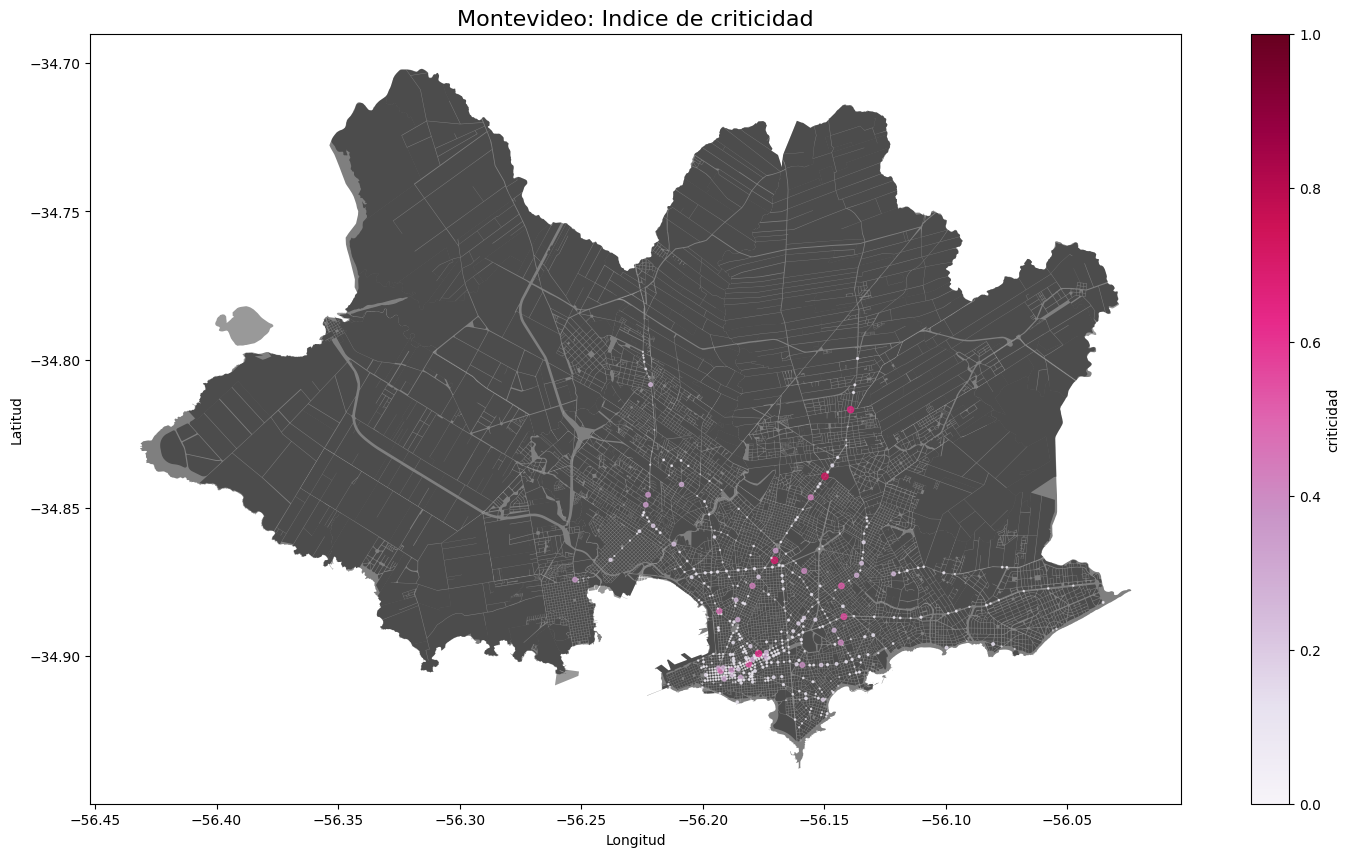

In [84]:
fig, ax = plt.subplots(figsize=(18, 10))
geoBarrios.plot(linewidth = 0,alpha = 0.5, ax=ax, color = 'black')
geoManzanas.plot(alpha = 0.4,ax=ax, color = 'black')
geoCentralidad.plot(ax=ax, markersize=geoCentralidad['jerarquia']*30, alpha=0.75, column='jerarquia', legend=True, cmap='PuRd',categorical=False, vmin=0,vmax=1, legend_kwds={"label": "criticidad","shrink":1})
plt.title("Montevideo: Indice de criticidad", size=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [85]:
geoCentralidad.sort_values('jerarquia',ascending=False).head(10)

LUOGO1  id_nodo  betweenness  \
172  Gral Flores y Jose Maria Guerra               ...     9020     0.052919   
146  L A de Herrera y Gualeguay                    ...     8001     0.057992   
572  Belloni y Domingo Arena, Camino Repetto       ...    26009     0.063274   
509  Uruguay y Fernandez Crespo                    ...    23057     0.001937   
94   Av Italia y Magarinos Cervantes               ...     6008     0.052748   
450  Colonia y Minas                               ...    22018     0.044848   
193  8 de Octubre y Pernas, Comercio, Gobernador Vi...    10013     0.019079   
249  Agraciada y Gral Aguilar                      ...    13004     0.038320   
402  Colonia y Paraguay                            ...    21011     0.053857   
157  Gral Flores y Vilardebo, Colorado, Garibaldi, ...     9005     0.026473   

                        geometry  ind_siniestros  jerarquia  
172  POINT (-56.14972 -34.83941)        0.666667   0.719586  
146  POINT (-56.17044 -34.86775)        0.636364   0.694356  
572   POINT (-56.13918 -34.8169)        0.583333   0.646607  
509    POINT (-56.177 -34.89921)        0.625000   0.626937  
94   POINT (-56.14194 -34.88678)        0.500000   0.552748  
450  POINT (-56.18104 -34.90277)        0.500000   0.544848  
193   POINT (-56.14293 -34.8764)        0.500000   0.519079  
249   POINT (-56.1932 -34.88489)        0.428571   0.466891  
402  POINT (-56.19262 -34.90503)        0.400000   0.453857  
157  POINT (-56.17955 -34.87639)        0.400000   0.426473

##Conclusiones
Se hizo un uso y análisis variado de todos los datos existentes, obteniendo diversos resultados, tales como:

  **Nodos Críticos:** Puntos dentro de la red que tienen alta importancia por relevancia para la conectividad de la red.

  **Áreas de Riesgo:** Zonas con alta frecuencia de siniestros, que podrían beneficiarse de intervenciones urbanísticas o medidas de seguridad adicionales.

  **Patrones Espaciales y Temporales**: Análisis de cómo la frecuencia de los siniestros varían en el espacio y el tiempo, con la posibilidad de identificar posibles causas subyacentes y oportunidades para la prevención.


La manipulación y visualización de datos geoespaciales son cruciales para revelar patrones espaciales y relaciones geográficas en estudios urbanos, facilitando la comprensión de dinámicas complejas y apoyando la toma de decisiones informada en planificación y gestión territorial.




_Estefanía Martínez_, _Marcos de León_

_Febrero de 2024_